# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from wordcloud import WordCloud



In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

# 1.Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


 we can see that Unnamed:2 ,3,4 has less number of null values ,so we are going to drop that 

In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
2734,ham,Can you do a mag meeting this avo at some point?
4865,ham,"Oh! Shit, I thought that was your trip! Looooo..."
2216,ham,OK i'm waliking ard now... Do u wan me 2 buy a...
4087,ham,He needs to stop going to bed and make with th...
2072,ham,That is wondarfull song


In [8]:
#Renamimg the colums name
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
df['target'].unique()

array(['ham', 'spam'], dtype=object)

### Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [12]:
df['target']=encoder.fit_transform(df['target'])  #ham assign as 0 and spam assign as 1

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

### There is no Missing values

In [15]:
#check for Duplicates values
df.duplicated().sum()

403

### There are 403 duplicates values available in dataset ,so simply we drop those duplicates values

In [16]:
#Remove Duplicates
df=df.drop_duplicates(keep='first')

In [17]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

# 2.Exploratory Data Analysis

In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

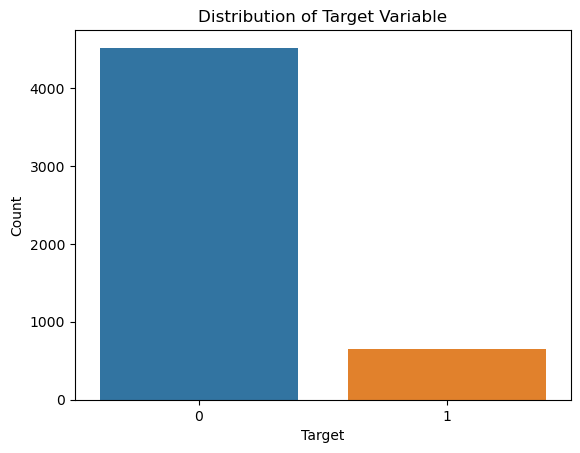

In [21]:
sns.countplot(x='target', data=df)

plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')

plt.show()


### The dataset is imbalanced, with a higher distribution of 'ham' compared to 'spam' instances.

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RAM_ANURAG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters']=df['text'].apply(len)

C:\Users\RAM_ANURAG\AppData\Local\Temp\ipykernel_17400\399031894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#numbers of words
#tokenization
df['text'].apply(lambda x:nltk.word_tokenize(x))


0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [27]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\RAM_ANURAG\AppData\Local\Temp\ipykernel_17400\1118471538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [28]:
df.head(2)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [29]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [30]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\RAM_ANURAG\AppData\Local\Temp\ipykernel_17400\754723001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [31]:
df.head(4)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1


In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


### Number of Characters (num_characters):

The average number of characters in the messages is approximately 78.98, with a standard deviation of 58.24.

The minimum number of characters is 2, and the maximum is 910.

The distribution is right-skewed, as the mean is higher than the median (50th percentile).

### Number of Words (num_words):

The average number of words in the messages is around 18.46, with a standard deviation of 13.32.

The minimum number of words is 1, and the maximum is 220.

Similar to the number of characters, the distribution is right-skewed.

### Number of Sentences (num_sentences):

The average number of sentences in the messages is approximately 1.97, with a standard deviation of 1.45.

The minimum number of sentences is 1, and the maximum is 38.

The majority of messages contain 1 or 2 sentences.

In [33]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


### Messages labeled as 'ham' (non-spam) are typically short and concise. On average, they have around 70 characters, 17 words, and consist of approximately 1 to 2 sentences. Most of these messages are relatively brief, with the majority falling within these shorter ranges.

In [34]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


###  Spam messages are usually longer, averaging about 138 characters, 28 words, and nearly 3 sentences. Most spam messages fall within these ranges, showing that they can vary in length. The longest spam message in the dataset had 224 characters, 46 words, and 9 sentences.

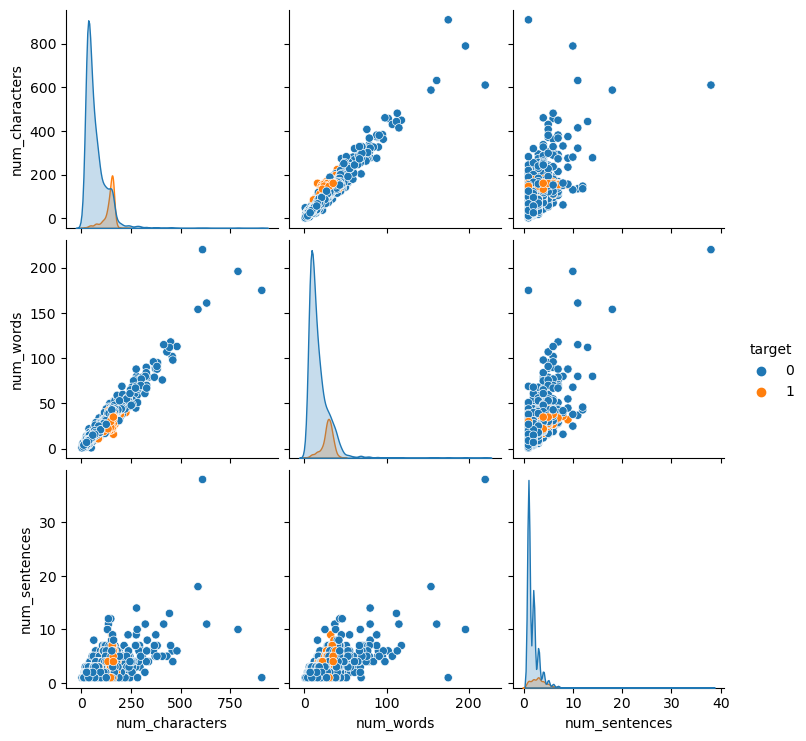

In [35]:
sns.pairplot(df,hue='target')

C:\Users\RAM_ANURAG\AppData\Local\Temp\ipykernel_17400\1128804820.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

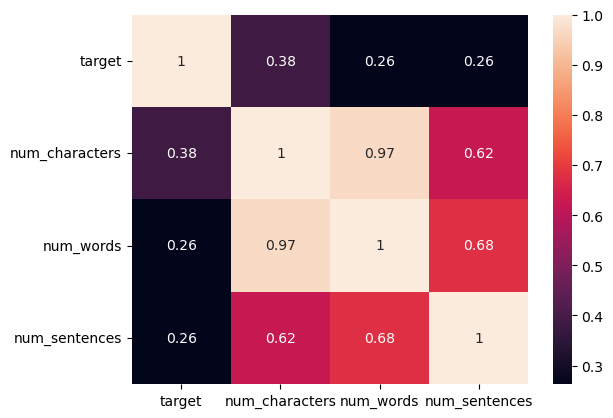

In [36]:
 sns.heatmap(df.corr(),annot=True)

### Correlation with Target:

The 'target' variable has a positive correlation of 1 with itself, as expected.

'num_characters' shows a moderate positive correlation of 0.38 with the'target.'

'num_words' and 'num_sentences' also exhibit positive correlations of 0.26 and 0.26, respectively, with the 'target.'

### Correlation between Numeric Variables:

'num_characters' and 'num_words' display a strong positive correlation of 0.97, indicating a high linear relationship.

'num_characters' and 'num_sentences' show a moderately positive correlation of 0.62.

'num_words' and 'num_sentences' exhibit a positive correlation of 0.68.

# 3.Text Preprocessing
**Lowercasing:** Making all letters lowercase for consistency.

**Tokenization:** Breaking down the text into individual words or tokens.

**Removing Special Characters**: Getting rid of non-alphanumeric characters.

**Removing Stopwords and Punctuation:** Eliminating common words (stopwords) and punctuation that usually don't contribute much to meaning.

**Stemming:** Reducing words to their root form to capture the base meaning.

In [37]:
def transform_text(text):
    # Convert to lowercase and tokenize
    words = nltk.word_tokenize(text.lower())
    
    # Remove non-alphanumeric characters
    words = [i for i in words if i.isalnum()]
    
    # Remove stopwords and punctuation
    words = [i for i in words if i not in stopwords.words('english') and i not in string.punctuation]
    
    # Apply stemming
    words = [PorterStemmer().stem(i) for i in words]
    
    return " ".join(words)


In [38]:
df['transformed_text'] = df['text'].apply(transform_text)


C:\Users\RAM_ANURAG\AppData\Local\Temp\ipykernel_17400\87086937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [39]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


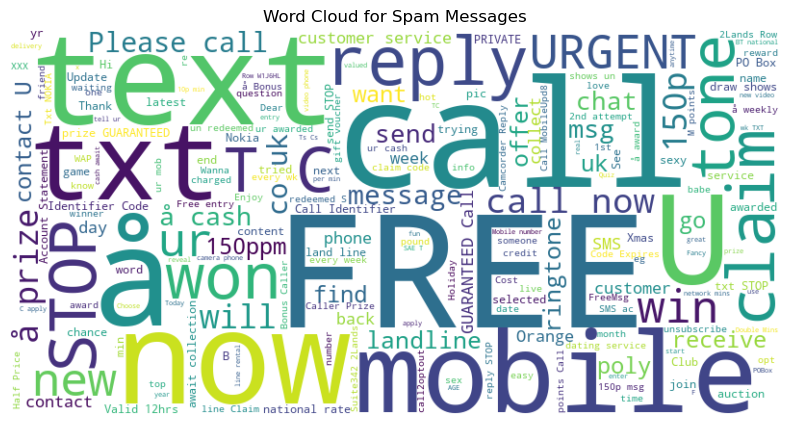

In [40]:
#wordcloud of spam message

df_spam = df[df['target'] == 1]

# Combine all spam messages into a single string
spam_text = " ".join(df_spam['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(spam_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()


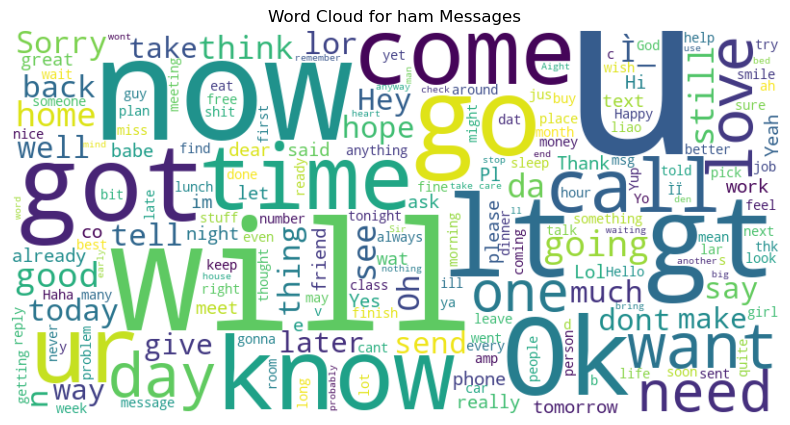

In [41]:
df_spam = df[df['target'] == 0]

# Combine all spam messages into a single string
spam_text = " ".join(df_spam['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(spam_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for ham Messages')

plt.show()

In [42]:
spam_corpus = [word for msg in df[df['target'] == 1]['transformed_text'].tolist() for word in msg.split()]
ham_corpus = [word for msg in df[df['target'] == 0]['transformed_text'].tolist() for word in msg.split()]

In [43]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [44]:
print(len(spam_corpus))

9939


### So, if you combine all the words from all spam messages, there are a total of 9939  Unique words in the transformed text of spam messages in your dataset

In [45]:
print(len(ham_corpus))  

35404


### The ham_corpus contains a total of 35,404 elements

In [46]:
from collections import Counter #This will give you a dictionary where keys are words, 
                               #and values are the corresponding counts of each word in the spam_corpus
word_counts_spam = Counter(spam_corpus)
word_counts_spam


Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [47]:
# Create a DataFrame with the 30 most common words and their counts
top_spam_words_df = pd.DataFrame(word_counts_spam.most_common(30), columns=['Word', 'Count'])

In [48]:
top_spam_words_df

,Word,Count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


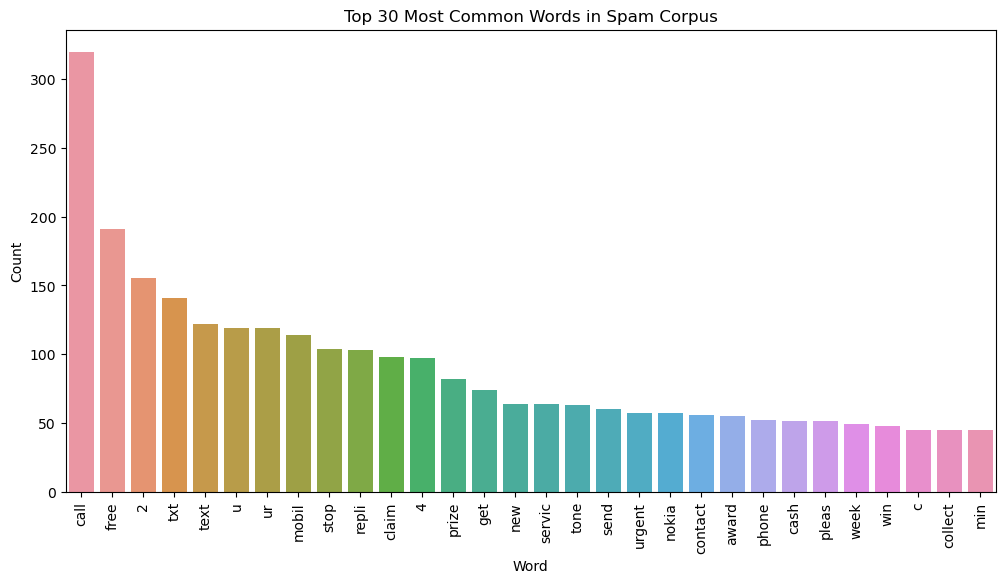

In [49]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=top_spam_words_df)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.show()

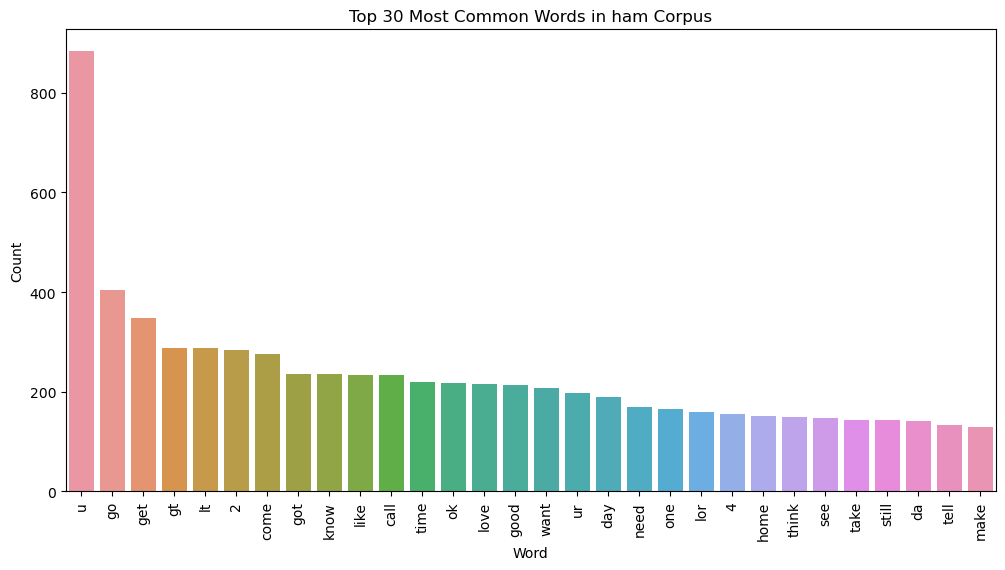

In [50]:
word_counts_ham = Counter(ham_corpus)

# Create a DataFrame with the 30 most common words and their counts
top_ham_words_df = pd.DataFrame(word_counts_ham.most_common(30), columns=['Word', 'Count'])

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=top_ham_words_df)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in ham Corpus')
plt.show()

# 4.Model Building

### Models Used:

#### 1-Gaussian Naive Bayes

#### 2- Multinomial Naive Bayes

#### 3-Bernoulli Naive Bayes

#### 4-Support Vector Classifier (SVC)

#### 5-Logistic Regression (LR)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer()

In [52]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [53]:
X.shape

(5169, 6708)

In [54]:
y=df['target'].values

In [55]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [57]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# Instantiate Naive Bayes classifiers
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Function to train, evaluate, and get classification report for a Naive Bayes classifier
def train_evaluate_report_nb(classifier, X_train, y_train, X_test, y_test, name):
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)
    
    # Evaluate performance on test set
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # Evaluate performance on training set
    y_pred_train = classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    # Print results
    print(f"{name} Naive Bayes:")
    print("Test Accuracy:", accuracy)
    print("Train Accuracy:", train_accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Precision:", precision)
    print("Classification Report:\n", report)
    print("\n")

# Train, evaluate, and get classification report for each Naive Bayes classifier
train_evaluate_report_nb(gnb, X_train, y_train, X_test, y_test, "Gaussian")
train_evaluate_report_nb(mnb, X_train, y_train, X_test, y_test, "Multinomial")
train_evaluate_report_nb(bnb, X_train, y_train, X_test, y_test, "Bernoulli")


Gaussian Naive Bayes:
Test Accuracy: 0.8762088974854932
Train Accuracy: 0.9230955259975816
Confusion Matrix:
 [[793 103]
 [ 25 113]]
Precision: 0.5231481481481481
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       896
           1       0.52      0.82      0.64       138

    accuracy                           0.88      1034
   macro avg       0.75      0.85      0.78      1034
weighted avg       0.91      0.88      0.89      1034



Multinomial Naive Bayes:
Test Accuracy: 0.9593810444874274
Train Accuracy: 0.9709794437726723
Confusion Matrix:
 [[896   0]
 [ 42  96]]
Precision: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       1.00      0.70      0.82       138

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96    

### Gaussian Naive Bayes:
Achieved an accuracy of 87.62%, with a precision of 52.31%. Notable misclassifications with some false positives.

### Multinomial Naive Bayes: 
Demonstrated high accuracy at 95.94%, achieving perfect precision (100.0%). No false positives observed.

### Bernoulli Naive Bayes: 
Exceptional performance with an accuracy of 97.00% and a precision of 97.35%. Minimal false positives, showcasing robust spam identification.







In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score

svc = SVC(kernel='sigmoid', gamma=1.0)
lrc = LogisticRegression(solver='liblinear', penalty='l1')

clfs = {
    'SVC' : svc,
    'LR': lrc, 
}

def train_classifier(clf, X_train, y_train, X_test, y_test):

    clf.fit(X_train, y_train)
    
    # Predict labels for train and test sets
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Calculate accuracy and precision scores for train and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    
    return train_accuracy, test_accuracy, precision

# Call the train_classifier function for each classifier
for clf_name, clf in clfs.items():
    train_accuracy, test_accuracy, precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print(f"{clf_name} Classifier:")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Precision: {precision}")


SVC Classifier:
Training Accuracy: 0.9859733978234583
Test Accuracy: 0.9729206963249516
Precision: 0.9741379310344828
LR Classifier:
Training Accuracy: 0.9610640870616687
Test Accuracy: 0.9516441005802708
Precision: 0.94


### Support Vector Classifier (SVC) :
Achieved a training accuracy of 98.60% and a test accuracy of 97.29%. The precision was 97.41%, indicating good performance on the test set.

### Logistic Regression (LR) :
Achieved a training accuracy of 96.11% and a test accuracy of 95.16%. The precision was 94.0%, suggesting slightly lower performance compared to SVC.

In [62]:
import pandas as pd

# Define the data for all model
data = {
    'Model': ['Gaussian Naive Bayes', 'Multinomial Naive Bayes', 'Bernoulli Naive Bayes','SVC', 'LR'],
    'Train Accuracy': [0.9231, 0.9709, 0.9765,0.9859, 0.9611],
    'Test Accuracy': [0.8762, 0.9594, 0.9700,0.9729, 0.9516],
    'Precision': [0.5231, 1.0000, 0.9735,0.9741, 0.9400]
}

df= pd.DataFrame(data)
print(df)


                     Model  Train Accuracy  Test Accuracy  Precision
0     Gaussian Naive Bayes          0.9231         0.8762     0.5231
1  Multinomial Naive Bayes          0.9709         0.9594     1.0000
2    Bernoulli Naive Bayes          0.9765         0.9700     0.9735
3                      SVC          0.9859         0.9729     0.9741
4                       LR          0.9611         0.9516     0.9400


## After evaluating various models, the Multinomial Naive Bayes classifier stands out as the optimal choice for spam identification. With its impressive accuracy, perfect precision, and absence of false positives

# 5.Save the Model

In [59]:
import pickle  # save the Multinomial Naive Bayes model 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))